In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('auto-mpg.csv',sep=',',index_col=None)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [31]:
model=pd.DataFrame(df,columns=['mpg','acceleration'])
points=model
points=points.reset_index().values

In [32]:
learningrate=0.0001
initial_c=0
initial_m=0
num_iterations=1400

In [33]:
def compute_error_for_line_given_points(c,m,points):
    totalError=0
    for i in range(0,len(points)):
        x=points[i,2]
        y=points[i,1]
        totalError += (y-(m*x+c))**2
    return totalError/float(len(points))

In [34]:
def step_gradient(c_current,m_current,points,learningRate):
    c_gradient=0
    m_gradient=0
    n=float(len(points))
    for i in range(0,len(points)):
        x=points[i,2]
        y=points[i,1]
        c_gradient += -(2/n)*(y-((m_current*x)+c_current))
        m_gradient += -(2/n)*x*(y-((m_current*x)+c_current))
    new_c=c_current-(learningRate*c_gradient)
    new_m=m_current-(learningRate*m_gradient)
    return (new_c,new_m)

In [35]:
def gradient_descent_runner(points,starting_c,starting_m,learningRate,num_iterations):
    c=starting_c
    m=starting_m
    for i in range(num_iterations):
        c,m=step_gradient(c,m,points,learningRate)
    return (c,m)

In [36]:
print "starting gradient descent at c={0},m={1},error={2}".format(initial_c,initial_m,compute_error_for_line_given_points(initial_c,initial_m,points))

starting gradient descent at c=0,m=0,error=613.871256281


In [37]:
[c,m]=gradient_descent_runner(points,initial_c,initial_m,learningrate,num_iterations)
print "After {0} iterations c = {1}, m = {2}, error = {3}".format(num_iterations, c, m, compute_error_for_line_given_points(c, m, points))

After 1400 iterations c = 0.134231660908, m = 1.49242160054, error = 50.8818322887


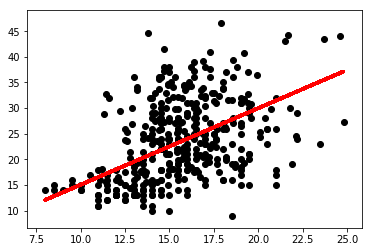

In [38]:
for i in range (0,len(points)):
    x=points[i,2]
    y=points[i,1]
    plt.scatter(x,y,color='black')
    plt.plot(model.acceleration,(m*model.acceleration+c),color='red',linewidth=3)

In [39]:
print 'y = {0}x + {1}'.format(m,c)

y = 1.49242160054x + 0.134231660908
